# FE621 - Homework #5

**Author**: Sid Bhatia

**Date**: May 10th, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Sveinn Olafsson

**TA**: Dong Woo Kim

## Problem 1 (Portfolio Wealth Growth)

### 1.1 Portfolio Wealth Growth Theory

This section delves into the theoretical mathematical foundation governing the growth of portfolio wealth over time. The analysis is crucial for understanding how investments evolve under the influence of various market factors, including returns and volatility.

#### 1.1.1 Mathematical Formulation

The wealth process $\{V_t\}_{t \geq 0}$ is modeled as a geometric Brownian motion (GBM), which is frequently used to represent stock prices and, by extension, portfolio values under stochastic environments. The stochastic differential equation (SDE) governing this process is given by:

$$
\frac{d V_t}{V_t} = \mu dt + \sigma dW_t \tag{1}
$$
Portfolio Wealth Growth Simulation vs. Expectation
Here:
- $V_t$ represents the portfolio value at time $t$.
- $\mu$ is the expected return of the portfolio, expressed as a percentage of the portfolio value.
- $\sigma$ is the volatility of the portfolio, which measures the standard deviation of the portfolio's returns.
- $dW_t$ is the increment of a standard Brownian motion, which captures the random fluctuations in the market.

##### Interpretation

Equation (1) can be interpreted as follows:
- The term $\mu dt$ captures the expected growth of the portfolio due to returns over an infinitesimally small time interval $dt$.
- The term $\sigma dW_t$ introduces randomness into the growth process, reflecting the uncertainty and risk inherent in the financial markets.

##### Solution to the Differential Equation

The solution to the stochastic differential equation (SDE) given in equation (1) can be expressed explicitly by integrating both sides over the interval from $0$ to $t$:

$$
\ln \frac{V_t}{V_0} = \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t \tag{2}
$$

where:
- $V_0$ is the initial value of the portfolio at time $t=0$.
- $W_t$ represents the standard Brownian motion at time $t$.

From equation (2), we can exponentiate both sides to obtain the explicit form of $V_t$:

$$
V_t = V_0 \exp{\left( (\mu - \frac{\sigma^2}{2})t + \sigma W_t \right)} \tag{3}
$$

##### Mathematical Synthesis

Equation (3) clearly shows how the portfolio value $V_t$ evolves over time. It indicates that the portfolio value is log-normally distributed with its mean and variance increasing over time. This formulation is fundamental in finance for modeling asset prices and helps in understanding the dynamic nature of investment growth under uncertainty.

#### 1.1.2 Expectation of Portfolio Wealth

The following section explores and delves into the expectation (first raw moment/arithmetic average) of the portfolio wealth process.

##### Expectation Calculation

Given the wealth process $V_t$ which follows a geometric Brownian motion (GBM) as described by:

$$
\frac{dV_t}{V_t} = \mu dt + \sigma dW_t \tag{1}
$$

The solution to this stochastic differential equation (SDE) indicates:

$$
V_t = V_0 \exp{\left( (\mu - \frac{\sigma^2}{2})t + \sigma W_t \right)} \tag{3}
$$

To find the expectation $\mathbb{E}[V_t]$, we note that $W_t$ is a standard Brownian motion (BM), which implies $\sigma W_t$ is normally distributed with mean $0$ and variance $\sigma^2 t$. Thus, $\sigma W_t \sim N(0, \sigma^2 t)$, and $e^{\sigma W_t}$ follows a log-normal distribution.

We can use the moment-generating function (MGF) of a normally distributed random variable to compute the expectation of a log-normal variable. For a random variable $X \sim \mathcal{N}(\mu_X, \sigma_X^2)$, the MGF of $X$ at $s$ is $M_X(s) = e^{\mu_X s + \frac{1}{2} \sigma_X^2 s^2}$. Setting $s = 1$, we find:

$$
\mathbb{E}[e^X] = e^{\mu_X + \frac{1}{2} \sigma_X^2} \tag{4}
$$

Applying this to our case, where $\mu_X = 0$ and $\sigma_X^2 = \sigma^2 t$, we get:

$$
\mathbb{E}[e^{\sigma W_t}] = e^{0 + \frac{1}{2} \sigma^2 t} = e^{\frac{1}{2} \sigma^2 t} \tag{5}
$$

Now, substituting this into the solution for $V_t$:

$$
\mathbb{E}[V_t] = \mathbb{E}\left[V_0 \exp\left((\mu - \frac{\sigma^2}{2}) t + \sigma W_t\right)\right]
$$

$$
= V_0 \exp \left( (\mu - \frac{\sigma^2}{2}) t \right) \mathbb{E}[e^{\sigma W_t}] \tag{6}
$$

Substituting the expectation of $e^{\sigma W_t}$:

$$
\mathbb{E}[V_t] = V_0 \exp \left( (\mu - \frac{\sigma^2}{2})t \right) \exp \left(\frac{1}{2} \sigma^2 t \right)
$$

$$
= V_0 \exp (\mu t) \tag{7}
$$

Thus, the expected wealth at time \(t\) is indeed given by:

$$
\mathbb{E}[V_t] = V_0 \exp(\mu t) \tag{7}
$$

This demonstrates that the expectation grows exponentially at a rate determined by the drift $\mu$, independent of the volatility $\sigma$.

### 1.2 Portfolio Wealth Growth Implementation

The following section implements applications of factors governing the growth of portfolio wealth over time in Python.

#### 1.2.1 True vs. Expected Path Simulation

This Python code snippet simulates $50$ paths of a portfolio's wealth process $\{V_t\}_{t \in [0, T]}$ modeled as a geometric Brownian motion (GBM) alongside the expected (arithmetic average) path $\{\mathbb{E}[V_t]\}_{t \in [0, T]}$. We use the parameters $\mu = 0.08$, $\sigma = 0.2$, $T = 30$ years, and an initial portfolio value $V_0 = 100$.

##### Code Breakdown

**Step 1: Import Libraries**:
   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for plotting the results.

```python
import numpy as np
import matplotlib.pyplot as plt
```

<br>

**Step 2: Set Parameters**:
   - `mu` : the expected return rate of the portfolio.
   - `sigma` : the volatility or standard deviation of returns.
   - `T` : the total time horizon for the simulation (30 years).
   - `dt` : the time increment for each step in the simulation.
   - `V0` : the initial portfolio value.
   - `N` : the number of time steps calculated as the total time divided by the increment.
   - `num_paths` : the number of simulation paths.

```python
mu = 0.08       # drift coefficient
sigma = 0.2     # volatility coefficient
T = 30          # time horizon
dt = 0.01       # time increment
V0 = 100        # initial wealth
N = int(T/dt)   # number of time steps
num_paths = 50  # number of paths to simulate
```

<br>

**Step 3: Simulate Paths**:
   - Generate multiple paths of the GBM using random normal distributions to simulate daily returns.
   - Calculate the portfolio value over time for each path based on the GBM formula.

```python
np.random.seed(42)  # for reproducibility
paths = np.zeros((num_paths, N))
for i in range(num_paths):
    dB = np.sqrt(dt) * np.random.normal(size=N-1)
    W = np.cumsum(dB)
    W = np.insert(W, 0, 0)  # insert the initial condition W_0 = 0
    paths[i] = V0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
```

<br>

**Step 4: Calculate Expected Path**:
   - Compute the expected path using the deterministic part of the GBM formula.

```python
expected_path = V0 * np.exp(mu * t)
```

<br>

**Step 5: Plot the Results**:
   - Plot all simulated paths and the expected path to visualize the potential variance around the expected growth.

```python
plt.figure(figsize=(12, 8))
for path in paths:
    plt.plot(t, path, 'r', linewidth=0.5, alpha=0.5)  # red lines for simulated paths
plt.plot(t, expected_path, 'b', linewidth=2.5, label='Expected Path $\mathbb{E}[V_t]$')  # blue line for the expected path
plt.title('Simulation of Portfolio Wealth Growth and Expected Path')
plt.xlabel('Time (years)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()
```

<img src="file:///C:/Users/sbhatia2/My%20Drive/University/Academics/Semester%20VI/FE621%20-%20Computational%20Methods%20in%20Finance/FE621%20-%20Homework/FE621%20-%20Homework%20%235/fe621-hw5-figs/fe621-hw5-fig1-pwg-sim-exp.png" alt="Portfolio Wealth Growth Simulation vs. Expectation" style="width:100%; max-width:800px;"/>

<figcaption style="text-align: center;"><i>Figure 1 - Portfolio Wealth Growth Simulation vs. Expectation</i></figcaption>

#### 1.2.2 Underperformance Confidence Interval Simulation

In this section, we estimate the probability that the terminal wealth $V_T$ underperforms the expected terminal wealth $\mathbb{E}[V_T]$ by varying degrees specified by $\alpha$. We will compute the $95\%$ confidence intervals for these probabilities.

##### Code Breakdown

**Step 1: Library Importation**

First, we need to import the necessary Python libraries for calculations and data handling.

```python
import numpy as np
import scipy.stats as stats
```

<br>

**Step 2: Parameter Definition**

We will define the parameters for the simulation, including the number of simulations $n$, and setup the range for $\alpha$.

```python
# Parameters
mu = 0.08       # drift coefficient
sigma = 0.2     # volatility coefficient
T = 30          # time horizon
V0 = 100        # initial wealth
n = 10000       # number of simulations
alphas = np.arange(1, 0, -0.1)  # range of alpha from 1 to 0.1
```

<br>

**Step 3: Terminal Wealth Value Simulation**

Simulate the terminal wealth values $V_T$ using the geometric Brownian motion model.

```python
np.random.seed(42)  # for reproducibility
terminal_values = V0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=n))
```

<br>

**Step 4: Underperformance Probability Computation**

For each $\alpha_i$, calculate the probability that $V_T$ is less than or equal to $\alpha \times \mathbb{E}[V_T]$. The expectation $\mathbb{E}[V_T]$ is computed based on its analytical expression.

```python
expected_VT = V0 * np.exp(mu * T)  # calculate expected V_T
probabilities = [np.mean(terminal_values <= alpha * expected_VT) for alpha in alphas]
```

<br>

**Step 5: Confidence Interval Computation**

Calculate the $95\%$ confidence intervals for the probabilities of underperformance using the normal approximation.

```python
confidence_intervals = [stats.norm.interval(0.95, loc=p, scale=np.sqrt((p*(1-p))/n)) for p in probabilities]
```

<br>

**Step 6: Result Output**

Finally, output the results in a structured format.

```python
print("Alpha\tProbability\t95% Confidence Interval")
for alpha, p, ci in zip(alphas, probabilities, confidence_intervals):
    print(f"{alpha:.1f}\t{p:.4f}\t{ci}")
```

<br>

#### 1.2.3 Underperformance Confidence Interval Simulation Results

The table below presents the estimated probabilities of underperformance $\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T])$ at various levels of $\alpha$ along with their $95\%$ confidence intervals, based on $n = 10,000$ simulations.

| Alpha | Probability | 95% Confidence Interval   |
|:-----:|:-----------:|:-------------------------:|
| 1.0   | 0.7103      | (0.7014, 0.7192)          |
| 0.9   | 0.6763      | (0.6671, 0.6855)          |
| 0.8   | 0.6373      | (0.6279, 0.6467)          |
| 0.7   | 0.5888      | (0.5792, 0.5984)          |
| 0.6   | 0.5334      | (0.5236, 0.5432)          |
| 0.5   | 0.4651      | (0.4553, 0.4749)          |
| 0.4   | 0.3871      | (0.3776, 0.3966)          |
| 0.3   | 0.2913      | (0.2824, 0.3002)          |
| 0.2   | 0.1797      | (0.1722, 0.1872)          |
| 0.1   | 0.0600      | (0.0553, 0.0647)          |

<figcaption style="text-align: center;"><i>Table 1 - Probabilities of Terminal Wealth Underperformance at Various Thresholds with 95% Confidence Intervals</i></figcaption>

<br>

This table helps visualize the varying degrees of underperformance risk associated with different thresholds of expected wealth, providing a statistical outlook on potential investment outcomes over time.

### 1.3 Formulaic Derivations & Theory of Terminal Wealth Underperformance 

This section explores the formulaic derivations and the theoretical aspects of the underperformance of terminal wealth $V_T$, defined as $\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T])$.

#### 1.3.1 Formula Derivation for Underperformance

We begin by rigorously defining and deriving the formula for the probability $\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T])$. To do this, consider that $V_T$, the terminal wealth, follows a log-normal distribution due to its dependence on a geometric Brownian motion (GBM) process:

$$
V_T = V_0 \exp \left((\mu - \frac{1}{2} \sigma^2) T + \sigma W_T \right) \tag{8}
$$

where:
- $V_0$ is the initial wealth.
- $\mu$ is the expected return.
- $\sigma$ is the volatility.
- $W_T$ is a standard Brownian motion at time $T$.

Given that $W_T$ follows a normal distribution $W_T \sim \mathcal{N}(\mu = 0, \sigma^2 = T)$, the variable $\sigma W_T$ is normally distributed as $\mathcal{N}(0, \sigma^2 T)$. Thus, we can transform $V_T$ to a standard normal variable by logarithmic transformation and normalization:

$$
\ln V_T = \ln V_0 + (\mu - \frac{1}{2} \sigma^2) T + \sigma W_T \tag{9}
$$

Let's define random variable $Z$ as:

$$
Z = \frac{\ln V_T - \ln V_0 - (\mu - \frac{1}{2} \sigma^2) T}{\sigma \sqrt{T}} \sim \mathcal{N}(0, 1) \tag{10}
$$

We want to find the probability that $V_T \leq \alpha \mathbb{E}[V_T]$. The expected terminal wealth $\mathbb{E}[V_T]$ is given by:

$$
\mathbb{E}[V_T] = V_0 \exp(\mu T) \tag{11}
$$

Thus, the inequality $V_T \leq \alpha \mathbb{E}[V_T]$ becomes:

$$
V_T \leq \alpha V_0 \exp (\mu T) \tag{12}
$$

Taking logarithms:

$$
\ln V_T \leq \ln(\alpha V_0 \exp (\mu T)) = \ln(\alpha) + \ln V_0 + \mu T \tag{13}
$$

Now, substituting $Z$:

$$
\ln V_0 + (\mu - \frac{1}{2} \sigma^2) T + \sigma \sqrt{T} Z \leq \ln(\alpha) + \ln V_0 + \mu T \tag{14}
$$

Simplifying and solving for $Z$:

$$
Z \leq \frac{\ln(\alpha) + \frac{1}{2} \sigma^2 T}{\sigma \sqrt{T}} \tag{15}
$$

This transformation yields a probability:

$$
\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T]) = \Phi\left(\frac{\ln(\alpha) + \frac{1}{2} \sigma^2 T}{\sigma \sqrt{T}}\right) \tag{16}
$$

where $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution. In the next section, we will compare these theoretical probabilities with those estimated in Table 1, and discuss the extent to which our calculated confidence intervals capture these exact, theoretical probabilities.

#### 1.3.2 Comparative Analysis of Theoretical and Empirical Probabilities of Wealth Underperformance

In this section, we compare the theoretical probabilities calculated for the underperformance of terminal wealth $V_T$ against the empirical estimates obtained from simulations, as presented in Table 1. The goal is to evaluate how well our simulated data aligns with the theoretical expectations derived from the probability density function of a log-normally distributed variable.

##### Theoretical Probabilities Calculation

Using the derived formula from the previous section:

$$
\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T]) = \Phi\left(\frac{\ln(\alpha) + \frac{1}{2} \sigma^2 T}{\sigma \sqrt{T}}\right) \tag{16}
$$

we calculate the theoretical probabilities for each $\alpha$ using the cumulative distribution function (CDF) $\Phi$ of the standard normal distribution. Here, $\sigma = 0.2$, $T = 30$, and the different values of $\alpha$ range from $1.0$ to $0.1$. Please note that these theoretical probabilities were computed in Python.

##### Comparison with Empirical Estimates

The table below compares the theoretical probabilities with the empirical estimates:

| Alpha | Empirical Probability | Theoretical Probability | 95% Confidence Interval   |
|:-----:|:---------------------:|:-----------------------:|:-------------------------:|
| 1.0   | 0.7103                | 0.7081                  | (0.7014, 0.7192)          |
| 0.9   | 0.6763                | 0.6742                  | (0.6671, 0.6855)          |
| 0.8   | 0.6373                | 0.6346                  | (0.6279, 0.6467)          |
| 0.7   | 0.5888                | 0.5879                  | (0.5792, 0.5984)          |
| 0.6   | 0.5334                | 0.5324                  | (0.5236, 0.5432)          |
| 0.5   | 0.4651                | 0.4661                  | (0.4553, 0.4749)          |
| 0.4   | 0.3871                | 0.3864                  | (0.3776, 0.3966)          |
| 0.3   | 0.2913                | 0.2907                  | (0.2824, 0.3002)          |
| 0.2   | 0.1797                | 0.1784                  | (0.1722, 0.1872)          |
| 0.1   | 0.0600                | 0.0601                  | (0.0553, 0.0647)          |

<figcaption style="text-align: center;"><i>Table 2 - Comparison of Empirical and Theoretical Probabilities of Terminal Wealth Underperformance</i></figcaption>

##### Discussion

From the table above, we can observe how closely the empirical probabilities and their confidence intervals align with the theoretical probabilities. This comparison helps validate our simulation methodology and provides insight into the accuracy and reliability of our model in capturing the dynamics of terminal wealth underperformance.

#### 1.3.3 Probability of Underperformance Convergence

This section explores the theoretical convergence of the probability $\mathbb{P}(V_T \leq \alpha \mathbb{E}[V_T])$ as the time horizon $T$ approaches infinity. Understanding this convergence provides insights into the long-term risk profile of the investment strategy.

##### Theoretical Background

Given the stochastic model for terminal wealth:

$$
V_T = V_0 \exp \left((\mu - \frac{1}{2} \sigma^2) T + \sigma W_T\right) \tag{8}
$$

where $W_T$ is a standard Brownian motion, the variable $V_T$ is log-normally distributed. The expected value of $V_T$ is $V_0 \exp(\mu T)$.

##### Convergence Analysis

As $T$ increases, the term $\sigma W_T$—which has a mean of 0 and a standard deviation of $\sigma \sqrt{T}$—becomes dominant in influencing the distribution of $\ln V_T$. This leads us to consider the behavior of the ratio $\frac{V_T}{\mathbb{E}[V_T]}$:

$$
\frac{V_T}{\mathbb{E}[V_T]} = \exp \left( -\frac{1}{2} \sigma^2 T + \sigma W_T \right) \tag{17}
$$

As $T \to \infty$, the distribution of $\ln \left(\frac{V_T}{\mathbb{E}[V_T]}\right) = -\frac{1}{2} \sigma^2 T + \sigma W_T$ shifts towards $-\infty$, because the deterministic component $-\frac{1}{2} \sigma^2 T$ dominates. Thus, regardless of the value of $\alpha$ (as long as $\alpha > 0$):

$$
\lim_{T \to \infty} \mathbb{P}\left(\frac{V_T}{\mathbb{E}[V_T]} \leq \alpha \right) = \lim_{T \to \infty} \mathbb{P}\left(-\frac{1}{2} \sigma^2 T + \sigma W_T \leq \ln(\alpha) \right) = 1 \tag{18}
$$

This implies that the probability that $V_T$ underperforms $\alpha \times \mathbb{E}[V_T]$ approaches 1 as $T$ becomes very large.

##### Implications

This result has significant implications for long-term investment strategies. It suggests that, under the assumed model, the relative underperformance compared to the growing expectation becomes almost certain in the long run. This highlights the importance of considering the effects of volatility and the time horizon in financial planning and risk assessment.

#### 1.3.4 Comparative Analysis of Terminal Wealth Expectation and Long-Run Wealth Trajectories

This section delves into the discrepancies between the expected terminal wealth, denoted as $\mathbb{E}[V_T]$, and the long-run behavior of individual wealth trajectories $V_T$. Understanding these differences is crucial for grasping the risks and variability inherent in investment strategies that follow a geometric Brownian motion (GBM) model.

##### Overview of Expected Terminal Wealth

The expected terminal wealth $\mathbb{E}[V_T]$ for a portfolio governed by geometric Brownian motion is calculated as:

$$
\mathbb{E}[V_T] = V_0 \exp (\mu T) \tag{11}
$$

where:
- $V_0$ is the initial investment,
- $\mu$ is the drift coefficient, and
- $T$ is the time horizon.

This formula indicates exponential growth of the expected wealth, driven primarily by the drift $\mu$.

##### Behavior of Individual Wealth Trajectories

In contrast, individual wealth trajectories $V_T$ are influenced not only by the drift but also significantly by the volatility component $\sigma$, modeled as:

$$
V_T = V_0 \exp \left((\mu - \frac{1}{2} \sigma^2) T + \sigma W_T\right) \tag{8}
$$

Here, $W_T$ represents the stochastic term, a standard Brownian motion, which introduces variability and risk into the trajectory. This results in a log-normally distributed terminal wealth, where the actual outcomes can vary widely around the expected value.

##### Comparative Analysis

While $\mathbb{E}[V_T]$ suggests a smooth, ever-increasing path, the reality of individual trajectories $V_T$ can be starkly different. The log-normal distribution implies that while some investment outcomes significantly exceed the expectation, others might fall well below, especially as the time horizon $T$ increases and the effects of volatility accumulate. This variability becomes more pronounced due to the exponential impact of $\sigma W_T$ in the formula.

Consider the implication of high volatility $\sigma$ values: even with a positive drift $\mu$, the spread of outcomes becomes broader over time, leading to a higher probability of both significantly high and significantly low outcomes relative to the expected value.

##### Implications for Investors

For investors, this analysis underscores the importance of considering volatility and time horizon in their risk assessment. While the average expected outcome might appear attractive, the actual risk of experiencing lower-than-expected returns can be substantial. This emphasizes the need for robust risk management strategies and possibly diversifying to mitigate extreme outcomes.

## Problem 2 (Estimating Expected Return $\mu$ and Volatility $\sigma$)

### 2.1 Estimator Theory

This section establishes the mathematical foundation for estimators concerning the expected return $\hat{\mu}$ and volatility $\hat{\sigma}$ of a financial instrument, such as a stock or equity.

#### 2.1.1 Mathematical Foundation

##### Time Partitioning and Return Assumptions

We begin by partitioning the total observation period $[0, T]$ into $m$ equal sub-intervals, each of length $\Delta$, where $m = \frac{T}{\Delta}$. This division allows us to observe and analyze the stock returns at regular intervals, reducing the complexity of continuous monitoring to discrete evaluations.

For each sub-interval, we model the stock's return $r_i^{(\Delta)}$ as:

$$
r_i^{(\Delta)} \sim \mathcal{N}(\mu \Delta, \sigma^2 \Delta), \; \; \; 1 \leq i \leq m, \tag{19}
$$

Here, $\mu$ represents the expected annual return (drift) of the stock, and $\sigma$ denotes the annual volatility. Notably, the mean return is proportional to the interval length $\Delta$, while the volatility of the return is scaled by $\sqrt{\Delta}$, reflecting the properties of Brownian motion in finance.

##### Estimator Derivation

Using the return samples $r_1^{(\Delta)}, \dots, r_m^{(\Delta)}$ collected over the $m$ intervals, we compute the historical estimators for $\mu$ and $\sigma$. The key to these estimations lies in adjusting for the interval length to ensure the annualization of the parameters:

$$
\hat{\mu} = \frac{\hat{\mu}^{(\Delta)}}{\Delta}, \; \; \; \hat{\sigma} = \frac{\hat{\sigma}^{(\Delta)}}{\sqrt{\Delta}} \tag{20}
$$

The estimators for the drift and volatility with respect to the chosen step size $\Delta$ are computed as follows:

$$
\hat{\mu}^{(\Delta)} = \frac{1}{m} \sum_{i=1}^m r_i^{(\Delta)}, \; \; \; \hat{\sigma}^{(\Delta)} = \sqrt{\frac{1}{m - 1} \sum_{i = 1}^m (r_i^{(\Delta)} - \hat{\mu}^{(\Delta)})^2}. \tag{21}
$$

##### Discussion

The rationale behind scaling $\hat{\mu}^{(\Delta)}$ by $\frac{1}{\Delta}$ and $\hat{\sigma}^{(\Delta)}$ by $\frac{1}{\sqrt{\Delta}}$ in Equation 20 is to normalize these estimates to an annual scale. This is crucial for comparing results across different time intervals or different securities with varying sampling frequencies.

##### Implications

The accurate computation of $\hat{\mu}$ and $\hat{\sigma}$ is fundamental for financial analysis and decision-making. These parameters are integral to the assessment of investment performance, risk management, and the strategic allocation of assets within portfolios. Understanding the mathematical underpinnings and appropriate methodologies for estimating these parameters ensures that financial analyses conducted on this basis are robust and reflective of true market dynamics.

### 2.2 Estimator Implementation

This section applies the mathematical and theoretical foundation discussed in Section 2.1 to simulate stock returns using Python and analyze the results.

#### 2.2.1 Return Simulation (Function)   

We implement a Python function to simulate returns according to Equation 19. This function will also compute the estimators for the expected return $\hat{\mu}$ and volatility $\hat{\sigma}$, repeating the process $n$ times to obtain $n$ independent realizations of these estimators.

##### Library Importation

The following code snippet imports the necessary libraries for the aforementioned task.

```python
import numpy as np
from typing import Tuple, List
```

<br>

##### Function Implementation

The following code snippet defines and implements the `simulate_returns(...)` function.

```python
def simulate_returns(mu: float, sigma: float, T: int, Delta: float, N: int) -> Tuple[np.ndarray, np.ndarray]:
    """Simulate returns based on the geometric Brownian motion model.
    
    Args:
        mu (float): Expected annual return.
        sigma (float): Volatility of returns.
        T (int): Total time period.
        Delta (float): Time step for simulation.
        N (int): Number of simulations to perform.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Arrays of estimated mu and sigma.
    """
    m = int(T / Delta)  # Number of time steps
    estimated_mus: List[float] = []
    estimated_sigmas: List[float] = []
    
    for _ in range(N):
        # Simulate returns for each sub-interval
        returns = np.random.normal(mu * Delta, sigma * np.sqrt(Delta), m)
        # Calculate estimators
        hat_mu_Delta = np.mean(returns)
        hat_sigma_Delta = np.std(returns, ddof=1)
        
        # Scale estimators to annualize them
        hat_mu = hat_mu_Delta / Delta
        hat_sigma = hat_sigma_Delta / np.sqrt(Delta)
        
        # Store results
        estimated_mus.append(hat_mu)
        estimated_sigmas.append(hat_sigma)
    
    return np.array(estimated_mus), np.array(estimated_sigmas)
```

<br>

##### Test Case

The following code snippet defines a test case to evaluate our function.

```python
# Set the seed for reproducibility
np.random.seed(42)

# Example usage
mu = 0.08  # 8% expected return
sigma = 0.2  # 20% volatility
T = 1  # 1 year
Delta = 1/252  # Daily returns
N = 1000  # Number of simulations

estimated_mus, estimated_sigmas = simulate_returns(mu, sigma, T, Delta, N)
```

<br>

##### Result Presentation

The following code snippet displays the result from the test case.

```python
# Display the results with four decimal places
print(f"Average Estimated mu: {np.mean(estimated_mus):.4f}")
print(f"Average Estimated sigma: {np.mean(estimated_sigmas):.4f}")
```

<br>

```python
Average Estimated mu: 0.0802
Average Estimated sigma: 0.1998
```

### 2.2.2 Return Simulation (Application)

This section applies the function developed in Section 2.2.1 across different sampling frequencies—monthly, weekly, and daily—to illustrate the impact of time step size $\Delta$ on the estimators $\hat{\mu}$ and $\hat{\sigma}$. We analyze the resulting sampling distributions through histograms to visualize how the estimators behave across various samples.

#### Library Importation

The following code snippet imports the necessary libraries for our analysis.

```python
import numpy as np
import matplotlib.pyplot as plt
```

<br>

#### Test Case and Result Result Presentation

We now test the `simulate_returns(...)` function with different $\Delta$ values and plot the histograms for the estimated $\hat{\mu}$ and $\hat{\sigma}$.

```python
# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for simulation
mu = 0.12  # 12% expected return
sigma = 0.16  # 16% volatility
T = 2  # 2 years
N = 1000  # Number of simulations
time_steps = [1/12, 1/52, 1/252]
labels = ['Monthly', 'Weekly', 'Daily']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex='col', sharey='row')
fig.suptitle('Sampling Distributions of Estimated Mu and Sigma')

for idx, Delta in enumerate(time_steps):
    estimated_mus, estimated_sigmas = simulate_returns(mu, sigma, T, Delta, N)
    
    # Plot histogram for mu
    axs[0, idx].hist(estimated_mus, bins=30, color='skyblue', edgecolor='black')
    axs[0, idx].set_title(f'{labels[idx]} Steps - Mu')
    axs[0, idx].set_xlabel('Estimated Mu')
    axs[0, idx].set_ylabel('Frequency')
    
    # Plot histogram for sigma
    axs[1, idx].hist(estimated_sigmas, bins=30, color='salmon', edgecolor='black')
    axs[1, idx].set_title(f'{labels[idx]} Steps - Sigma')
    axs[1, idx].set_xlabel('Estimated Sigma')
    axs[1, idx].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
```

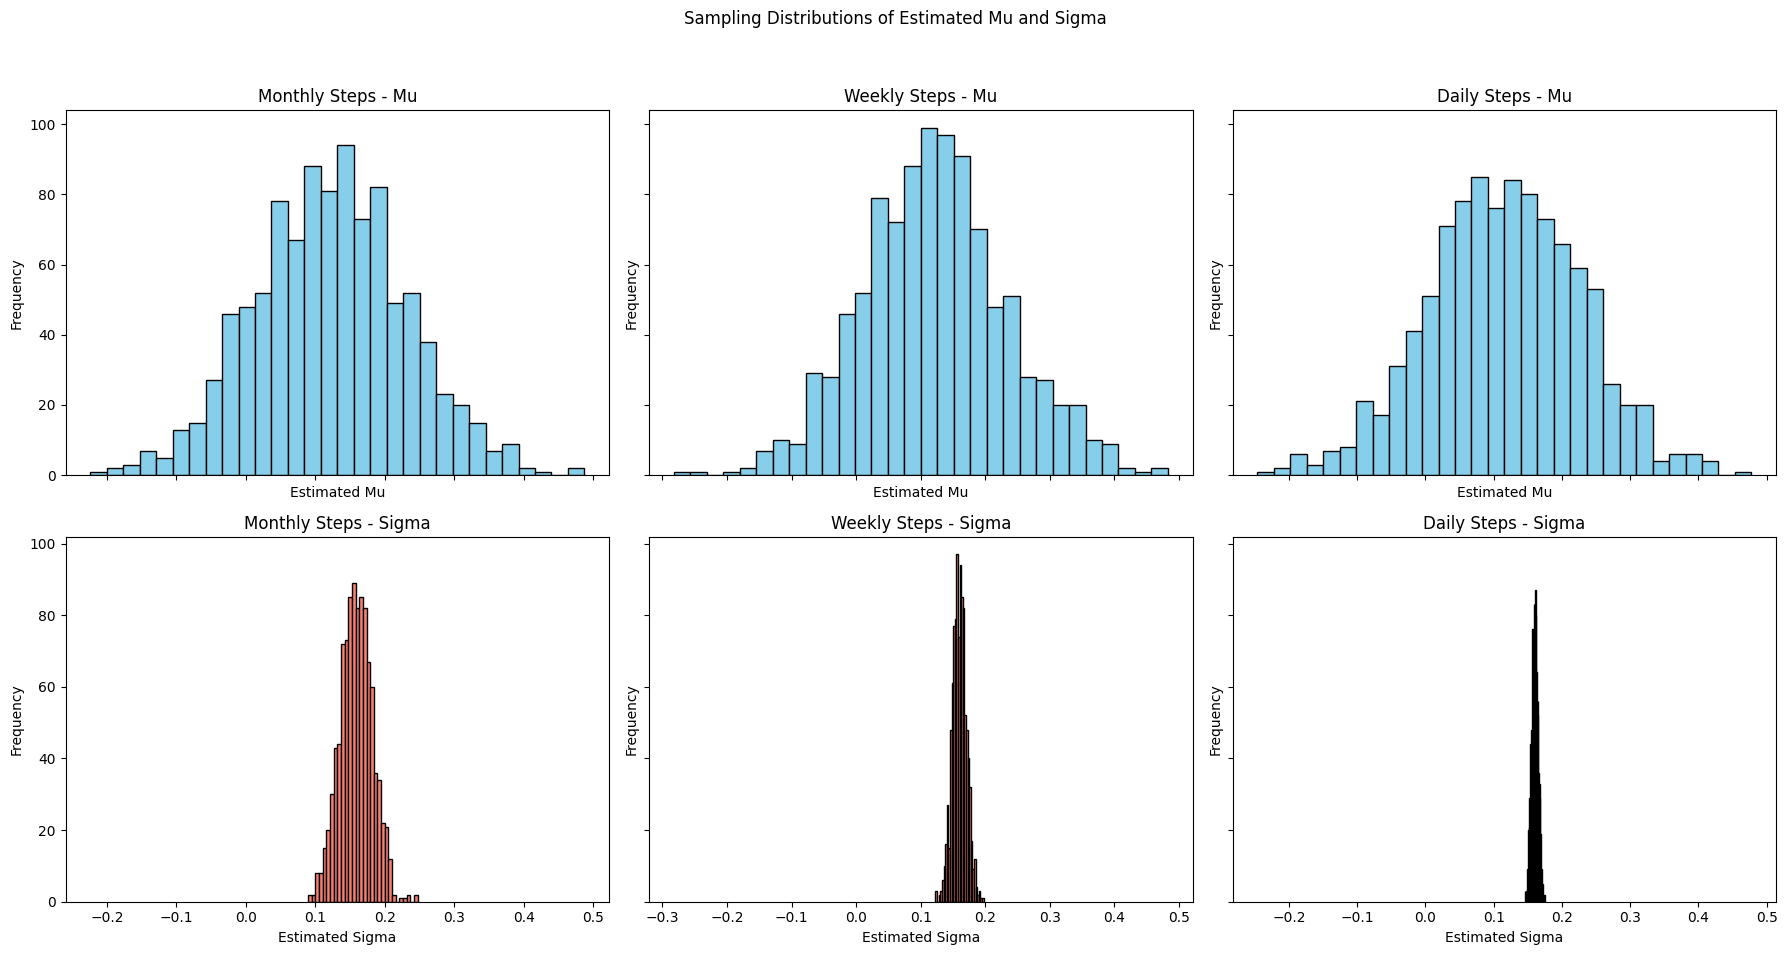

In [30]:
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for simulation
mu = 0.12  # 12% expected return
sigma = 0.16  # 16% volatility
T = 2  # 2 years
N = 1000  # Number of simulations
time_steps = [1/12, 1/52, 1/252]
labels = ['Monthly', 'Weekly', 'Daily']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex='col', sharey='row')
fig.suptitle('Sampling Distributions of Estimated Mu and Sigma')

for idx, Delta in enumerate(time_steps):
    estimated_mus, estimated_sigmas = simulate_returns(mu, sigma, T, Delta, N)
    
    # Plot histogram for mu
    axs[0, idx].hist(estimated_mus, bins=30, color='skyblue', edgecolor='black')
    axs[0, idx].set_title(f'{labels[idx]} Steps - Mu')
    axs[0, idx].set_xlabel('Estimated Mu')
    axs[0, idx].set_ylabel('Frequency')
    
    # Plot histogram for sigma
    axs[1, idx].hist(estimated_sigmas, bins=30, color='salmon', edgecolor='black')
    axs[1, idx].set_title(f'{labels[idx]} Steps - Sigma')
    axs[1, idx].set_xlabel('Estimated Sigma')
    axs[1, idx].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()